In [1]:
import numpy as np
import pandas as pd
np.random.seed(0)
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

from matplotlib import pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.gridspec as gridspec

plt.rcParams["font.family"] = "Times New Roman"
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import NearestNeighbors

pd.set_option("display.precision",2)

In [2]:
df = pd.read_excel("Dati CORE OM.xlsx")
df = df.rename(columns={"RIS (media)":"Risorse", "PRO (media)": "Problemi"})
df.loc[:, ["Risorse","Problemi"]] = df.loc[:, ["Risorse","Problemi"]].apply(lambda x: np.round(x/2*10))
df

,ID,Categoria,Età,Lavoro,Sex,RIS-G,RIS-T,RIS-OMN,PRO-G,PRO-T,PRO-OMN,Risorse,Problemi,Fasce età
0,Lecco 2,Infermiere,24,STRA,F,62,16,0,2,18,0,19.0,1.0,1
1,Meda 3,Infermiere,25,STRA,F,58,16,0,4,18,0,18.0,1.0,1
2,Pavia 2,Infermiere,25,STRA,F,57,16,0,5,18,1,18.0,1.0,1
3,Linate 2,Infermiere,25,STRA,F,42,16,0,10,18,0,13.0,3.0,1
4,Linate 7,Infermiere,26,SPE,M,63,16,0,0,18,0,20.0,0.0,1
5,Caponago 2,Infermiere,26,STRA,M,52,16,0,8,18,0,16.0,2.0,1
6,Linate 5,Medico,26,STRA,M,52,16,0,15,18,0,16.0,4.0,1
7,Linate 8,Infermiere,27,SPE,M,62,16,0,0,18,0,19.0,0.0,1
8,Caponago 1,Medico,28,STRA,M,61,16,0,2,18,0,19.0,1.0,1
9,Lecco 1,Medico,28,STRA,M,59,16,0,7,18,0,18.0,2.0,1


In [3]:
df[["Risorse","Problemi"]].describe()

,Risorse,Problemi
count,34.00,34.00
mean,17.21,1.50
std,2.19,1.38
min,11.00,0.00
25%,16.00,0.25
50%,18.00,1.00
75%,19.00,2.00
max,20.00,5.00


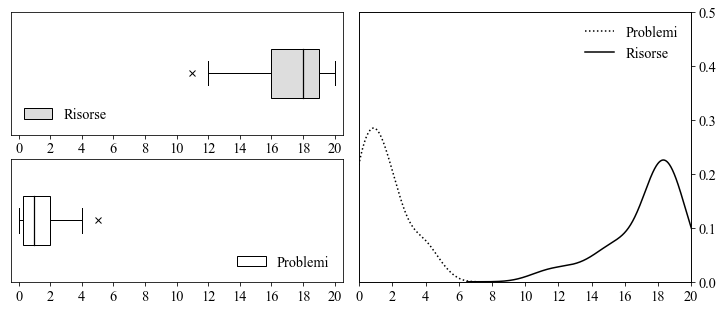

In [4]:
fig = plt.subplots(figsize=(10,5))

gs = gridspec.GridSpec(2, 2)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[1, 0])
ax3 = plt.subplot(gs[:, 1])

flierprops = dict(marker='x', markersize=6, linestyle='none')
medianprops = dict(linestyle='-', linewidth=1.25, color='k')
boxprops = dict(linestyle='-',color='k', facecolor="#ddd")
boxprops2 = dict(linestyle='-',color='k', facecolor="#fff")


bp1 = ax1.boxplot(df["Risorse"], 
            meanline=True, widths=.4, patch_artist=True,
            flierprops=flierprops, medianprops=medianprops, boxprops=boxprops, vert=False)

bp2 = ax2.boxplot(df["Problemi"], 
            meanline=True, widths=.4, patch_artist=True,
            flierprops=flierprops, medianprops=medianprops, boxprops=boxprops2, vert=False)

df[["Problemi"]].plot.kde(ax=ax3, linestyle=":", bw_method=.5,color="k")
df[["Risorse"]].plot.kde(ax=ax3, linestyle="-",bw_method=.5,color="k")

ax1.set_xlim((-0.5,20.5))
ax2.set_xlim((-0.5,20.5))
ax1.xaxis.set_major_locator(mticker.MultipleLocator(2))
ax1.yaxis.set_major_locator(mticker.NullLocator())
ax2.yaxis.set_major_locator(mticker.NullLocator())
ax2.xaxis.set_major_locator(mticker.MultipleLocator(2))

ax3.set_xlim((0,20))
ax3.set_ylim((0,.5))

ax3.legend(frameon=False)
ax3.yaxis.set_major_locator(mticker.NullLocator())
ax3.xaxis.set_major_locator(mticker.MultipleLocator(2))
ax3.set_ylabel("")
r3 = ax3.twinx()
r3.set_ylim(ax3.get_ylim())

ax1.legend([bp1["boxes"][0]], ['Risorse'], loc="lower left", frameon=False)
ax2.legend([bp2["boxes"][0]], ['Problemi'], loc="lower right", frameon=False)

# reduce horizontal space
fig[0].subplots_adjust(left=0.005, right=0.95, top=0.9, bottom=0.15, wspace=0.05)

# save
plt.savefig("../latex/figures/plot4.pdf",bbox_inches='tight',pad_inches=0.1)


In [5]:
X = df[["Problemi","Risorse"]].values
dbscan = DBSCAN(eps=1.3, min_samples=3).fit(X)
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
labels = dbscan.labels_
labels

array([ 0,  0,  0,  1,  0,  1, -1,  0,  0,  0, -1,  0,  1,  0,  0,  0,  1,
        0, -1, -1,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0])

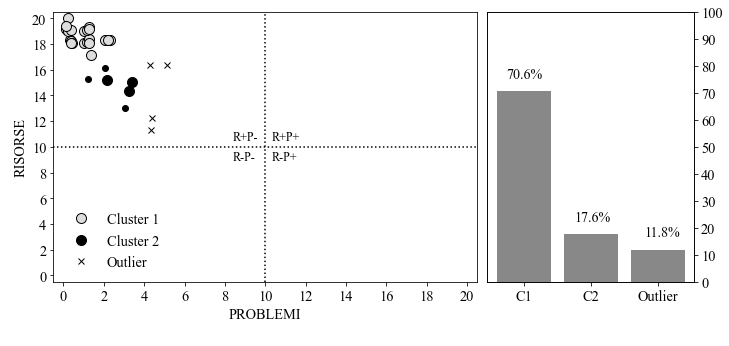

In [29]:
fig = plt.subplots(figsize=(10,5))

gs = gridspec.GridSpec(1, 3)
ax1 = plt.subplot(gs[0, :2])
ax2 = plt.subplot(gs[0, 2])

class_member_mask = (labels == 0)
xy = X[class_member_mask & core_samples_mask]
xy = np.clip(xy+(np.random.rand(*xy.shape)*4e-1), 0,20)
ax1.plot(xy[:, 0], xy[:, 1], linewidth=0,clip_on=False,
         marker="o", markerfacecolor="#ddd", markeredgecolor='k', markersize=10, alpha=1, label="Cluster 1")

xy = X[class_member_mask & ~core_samples_mask]
xy = np.clip(xy+(np.random.rand(*xy.shape)*4e-1), 0,20)
ax1.plot(xy[:, 0], xy[:, 1], linewidth=0,clip_on=False,
         marker="o", markerfacecolor="#ddd", markeredgecolor='k', markersize=6, alpha=1 )

class_member_mask = (labels == 1)

xy = X[class_member_mask & core_samples_mask]
xy = np.clip(xy+(np.random.rand(*xy.shape)*4e-1), 0,20)
ax1.plot(xy[:, 0], xy[:, 1], linewidth=0,clip_on=False,
         marker="o", markerfacecolor="k", markeredgecolor='k', markersize=10, alpha=1, label="Cluster 2")

xy = X[class_member_mask & ~core_samples_mask]
xy = np.clip(xy+(np.random.rand(*xy.shape)*4e-1), 0,20)
ax1.plot(xy[:, 0], xy[:, 1],linewidth=0,clip_on=False,
         marker="o", markerfacecolor="k", markeredgecolor='k', markersize=6, alpha=1)

class_member_mask = (labels == -1)
xy = X[class_member_mask & ~core_samples_mask]
xy = np.clip(xy+(np.random.rand(*xy.shape)*4e-1), 0,20)
ax1.plot(xy[:, 0], xy[:, 1],linewidth=0,clip_on=False,
         marker="x", markerfacecolor="#ddd", markeredgecolor='k', markersize=6, label="Outlier" )

ax1.vlines(10,-0.5,20.5, linestyle=":", color="k")
ax1.hlines(10,-0.5,20.5, linestyle=":", color="k")
ax1.annotate("R+P-",(8.4,10.5), fontsize=12)
ax1.annotate("R+P+",(10.3,10.5), fontsize=12)
ax1.annotate("R-P+",(10.3,9), fontsize=12)
ax1.annotate("R-P-",(8.4,9), fontsize=12)

ax1.set_xlabel("PROBLEMI")
ax1.set_ylabel("RISORSE")
ax1.set_xlim((-0.5,20.5))
ax1.set_ylim((-0.5,20.5))
ax1.legend(loc="lower left", frameon=False)
ax1.xaxis.set_major_locator(mticker.MultipleLocator(2))
ax1.yaxis.set_major_locator(mticker.MultipleLocator(2))

c1 = X[labels==0].shape[0] / X.shape[0] *100
ax2.bar("C1",c1 , width=0.8, color="#888")
ax2.annotate(f"{'%.1f' % c1}%", (-0.25, c1+5), fontsize=14)

c2 = X[labels==1].shape[0] / X.shape[0] *100
ax2.bar("C2", c2, width=0.8, color="#888")
ax2.annotate(f"{'%.1f' % c2}%", (.75, c2+5), fontsize=14)

c3 = X[labels==-1].shape[0] / X.shape[0] *100
ax2.bar("Outlier", c3, width=0.8, color="#888")
ax2.annotate(f"{'%.1f' % c3}%", (1.8, c3+5), fontsize=14)

ax2.set_ylim((0,100))
ax2.yaxis.set_major_locator(mticker.NullLocator())
ax2.set_ylabel("")
r2 = ax2.twinx()
r2.set_ylim(ax2.get_ylim())
r2.yaxis.set_major_locator(mticker.MultipleLocator(10))


# reduce horizontal space
fig[0].subplots_adjust(left=0.06, right=0.95, top=0.9, bottom=0.15, wspace=0.05)


# save
plt.savefig("../latex/figures/plot5.pdf",bbox_inches='tight',pad_inches=0.1)


In [37]:
4e-1

0.4